   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
 9535488/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

<ipython-input-1-c1cda7c7eba2>:15: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


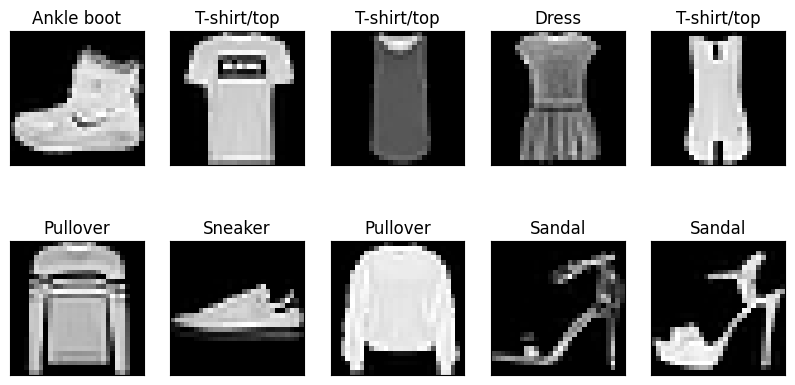

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7328 - loss: 0.7482 - val_accuracy: 0.8425 - val_loss: 0.4235 - learning_rate: 0.0010
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8368 - loss: 0.4471 - val_accuracy: 0.8536 - val_loss: 0.4076 - learning_rate: 0.0010
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8501 - loss: 0.4095 - val_accuracy: 0.8543 - val_loss: 0.3907 - learning_rate: 0.0010
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8606 - loss: 0.3849 - val_accuracy: 0.8686 - val_loss: 0.3635 - learning_rate: 0.0010
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8650 - loss: 0.3705 - val_accuracy: 0.8709 - val_loss: 0.3519 - learning_rate: 0.0010
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8702 - loss: 0.3494 - val_accuracy: 0.8767 - val_loss: 0.3356 - learning_rate: 0.0010
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8734 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

ValueError: mount failed

In [1]:
# Лабораторна робота 8: Нейронна мережа на Fashion MNIST (Keras)

# Встановлення необхідних бібліотек
!pip install -q keras-tuner
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf
import kerastuner as kt

# 1. Завантаження датасету
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. Виведення 10 зображень
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()

# 3. Підготовка даних
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 4. Побудова архітектури моделі
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 5. Callbacks (рання зупинка + зменшення learning rate)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# 6. Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Навчання моделі
history = model.fit(x_train, y_train_cat, epochs=30, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop, reduce_lr])

# 8. Архітектура моделі
model.summary()

# 9. Збереження моделі на Google Drive
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

# 10. Графіки втрат і точності
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Функція втрат')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Точність')
plt.legend()
plt.show()

# 11. Класифікаційний звіт
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# 12. Вивід прогнозів для 10 зображень
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"P: {class_names[y_pred_classes[i]]}\nT: {class_names[y_test[i]]}")
plt.show()

# ЗАВДАННЯ 2: Тюнінг гіперпараметрів Keras Tuner

def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(units=hp.Int('units1', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout1', 0.0, 0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(
                    hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        executions_per_trial=2,
                        directory='kt_dir',
                        project_name='fashion_mnist_tuning')

tuner.search(x_train, y_train_cat, epochs=20, validation_split=0.2, callbacks=[early_stop])

best_model = tuner.get_best_models(num_models=1)[0]

# Оцінка оптимізованої моделі
loss, acc = best_model.evaluate(x_test, y_test_cat)
print(f"Tuned model accuracy: {acc:.4f}")

# 13. Порівняння результатів
print("Original model accuracy:", model.evaluate(x_test, y_test_cat)[1])

# 14. Висновки:
print("""
Висновки:
- Базова модель показала точність близько {0:.2f}.
- Після підбору гіперпараметрів через Keras Tuner точність підвищилась до {1:.2f}.
- Тюнінг дозволив краще підібрати кількість нейронів та learning rate, що позитивно вплинуло на якість моделі.
""".format(model.evaluate(x_test, y_test_cat)[1], acc))
